In [1]:
# importing libraries
import os
import shutil
import natsort


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
from tqdm import tqdm
from re import search

In [3]:
# setting directory paths
DIR = "./images"
train =pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

## exploring data

In [4]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


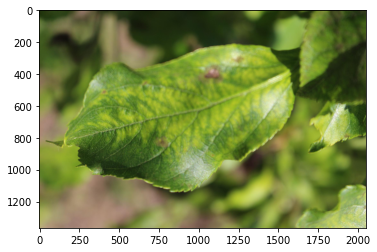

In [6]:
image1 = Image.open("./images/Train_0.jpg")
plt.imshow(image1)
plt.show()

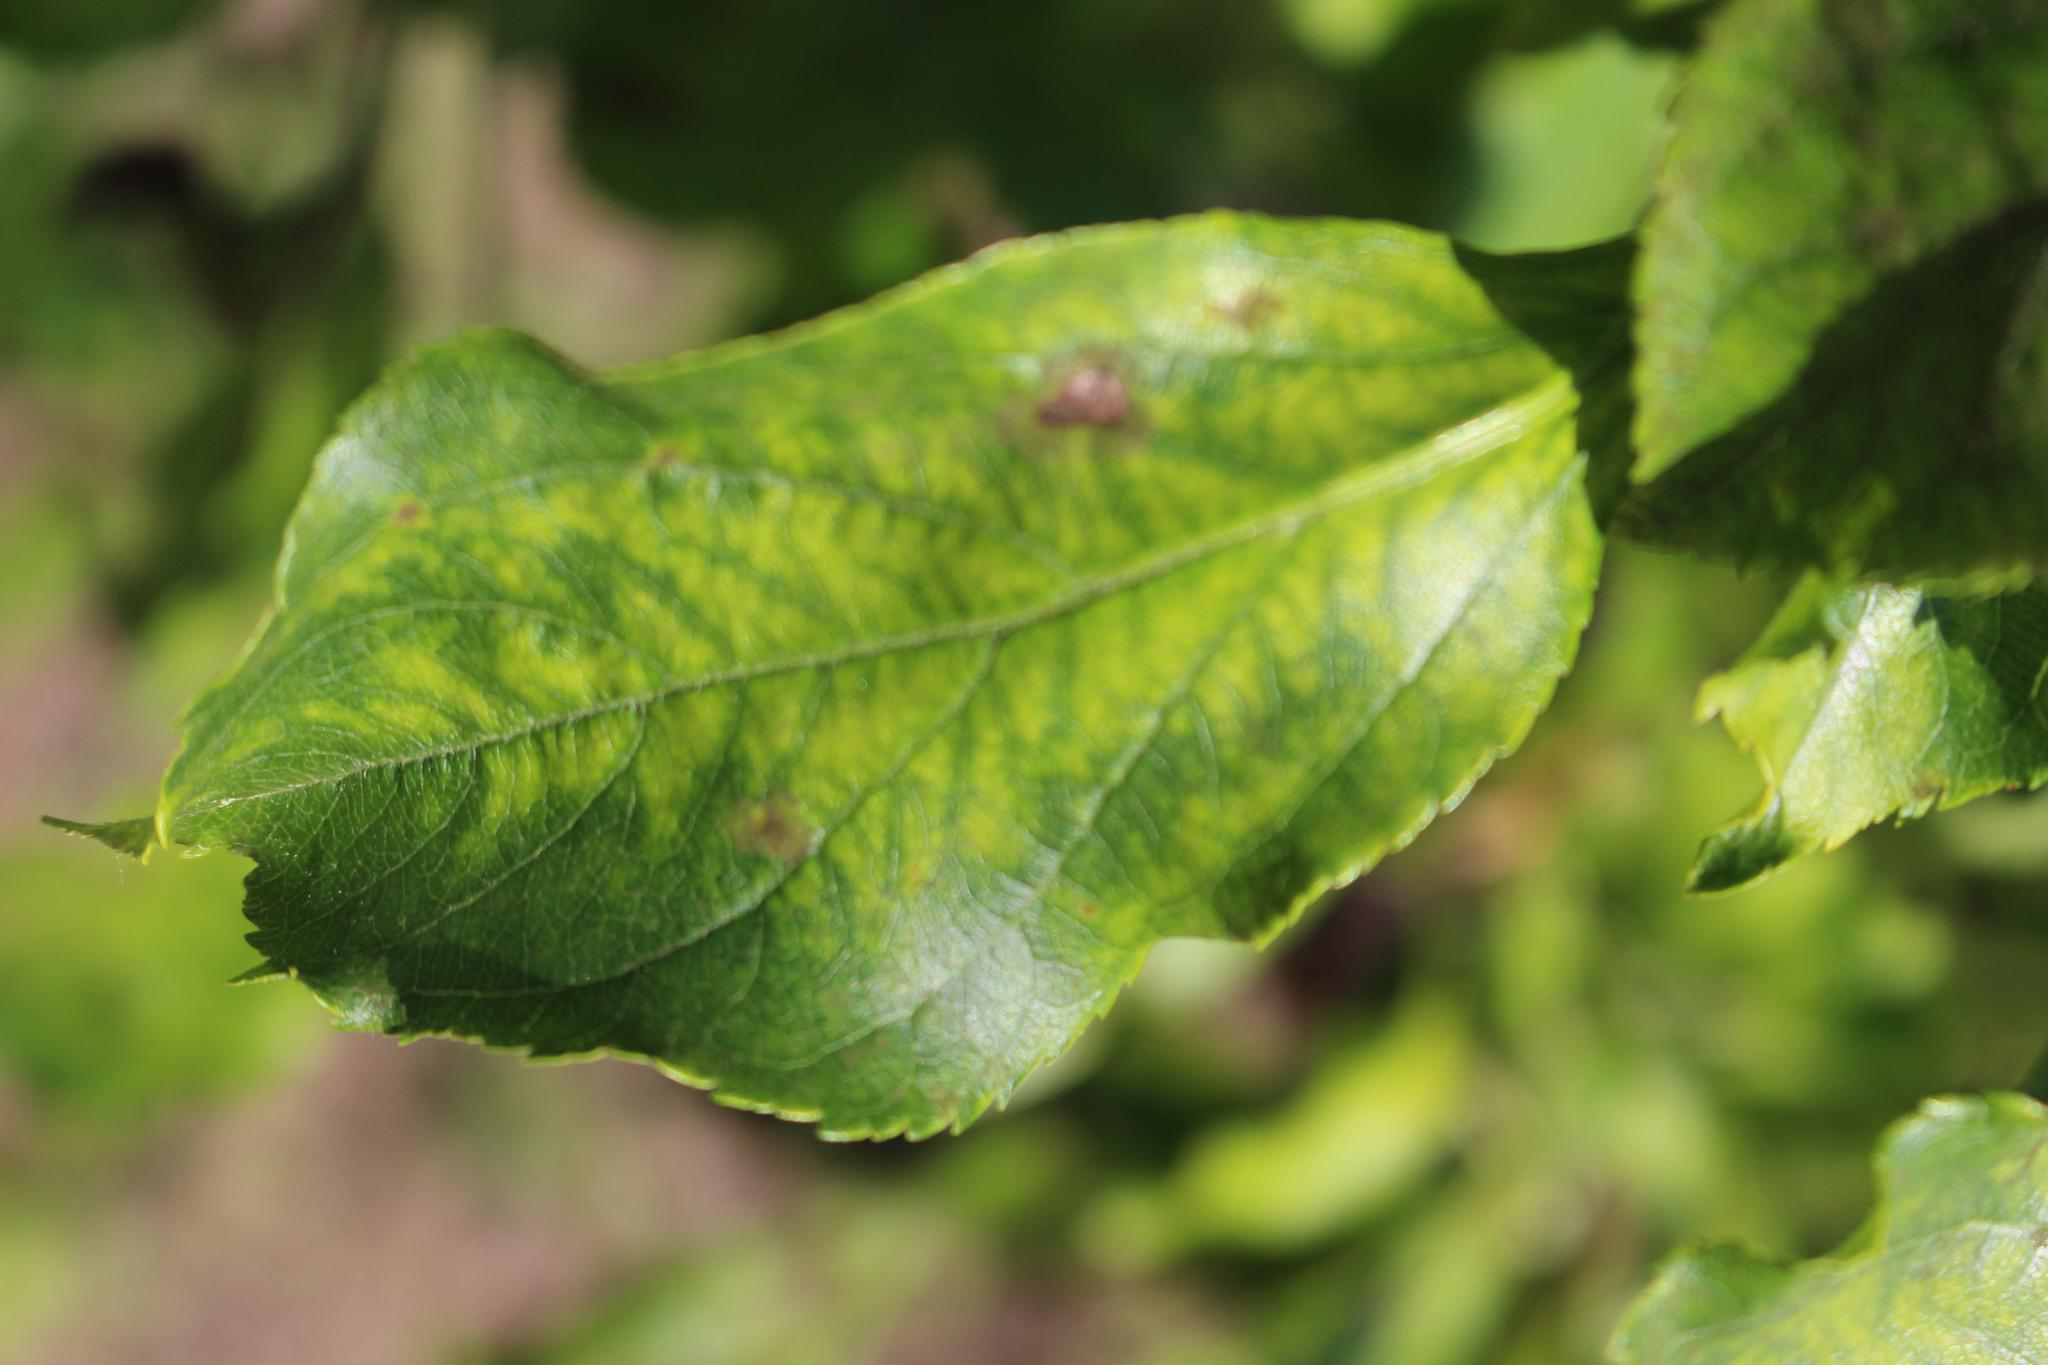

In [7]:
image1

In [8]:
class_names = train.loc[:, 'healthy':].columns
class_names

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')

## data preparation

In [10]:
# making new column
train['label']=0

In [11]:
train

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,0
1,Train_1,0,1,0,0,0
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,0
4,Train_4,1,0,0,0,0
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,0
1817,Train_1817,1,0,0,0,0
1818,Train_1818,1,0,0,0,0
1819,Train_1819,0,0,1,0,0


In [12]:
number  = 0
for i in class_names:
    print('train label before = ',train['label'])
    train['label']= train['label']+train[i]*number
    print('train label = ',train['label'])
    print('train i = ',train[i])
    print('number = ',number)
    number+=1

train label before =  0       0
1       0
2       0
3       0
4       0
       ..
1816    0
1817    0
1818    0
1819    0
1820    0
Name: label, Length: 1821, dtype: int64
train label =  0       0
1       0
2       0
3       0
4       0
       ..
1816    0
1817    0
1818    0
1819    0
1820    0
Name: label, Length: 1821, dtype: int64
train i =  0       0
1       0
2       1
3       0
4       1
       ..
1816    0
1817    1
1818    1
1819    0
1820    0
Name: healthy, Length: 1821, dtype: int64
number =  0
train label before =  0       0
1       0
2       0
3       0
4       0
       ..
1816    0
1817    0
1818    0
1819    0
1820    0
Name: label, Length: 1821, dtype: int64
train label =  0       0
1       1
2       0
3       0
4       0
       ..
1816    0
1817    0
1818    0
1819    0
1820    0
Name: label, Length: 1821, dtype: int64
train i =  0       0
1       1
2       0
3       0
4       0
       ..
1816    0
1817    0
1818    0
1819    0
1820    0
Name: multiple_diseases, Lengt

In [13]:
train


,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,3
1817,Train_1817,1,0,0,0,0
1818,Train_1818,1,0,0,0,0
1819,Train_1819,0,0,1,0,2


In [22]:
# --- making directories-------------
shutil.os.mkdir("/home/vaibhav/Documents/apple_leave/data_prepare/train/multiple_diseases")
shutil.os.mkdir("/home/vaibhav/Documents/apple_leave/data_prepare/train/healthy")
shutil.os.mkdir("/home/vaibhav/Documents/apple_leave/data_prepare/train/rust")
shutil.os.mkdir("/home/vaibhav/Documents/apple_leave/data_prepare/train/scab")


shutil.os.mkdir("/home/vaibhav/Documents/apple_leave/data_prepare/test")


In [23]:
# example
img ='Train_66.jpg'
img1=img.split('.')
img2=img.split('.')[0]
print(img1)
print(img2)

['Train_66', 'jpg']
Train_66


In [24]:
# example
os.listdir(DIR)

['Train_188.jpg',
 'Test_857.jpg',
 'Train_911.jpg',
 'Train_1405.jpg',
 'Train_1191.jpg',
 'Train_303.jpg',
 'Train_197.jpg',
 'Train_529.jpg',
 'Train_1737.jpg',
 'Test_493.jpg',
 'Test_963.jpg',
 'Train_917.jpg',
 'Test_13.jpg',
 'Test_440.jpg',
 'Test_1336.jpg',
 'Train_1214.jpg',
 'Test_997.jpg',
 'Test_725.jpg',
 'Test_985.jpg',
 'Test_1568.jpg',
 'Train_1141.jpg',
 'Test_1254.jpg',
 'Test_1710.jpg',
 'Train_1428.jpg',
 'Train_1109.jpg',
 'Test_1543.jpg',
 'Train_52.jpg',
 'Test_607.jpg',
 'Test_603.jpg',
 'Test_710.jpg',
 'Test_1023.jpg',
 'Train_1423.jpg',
 'Train_355.jpg',
 'Test_1674.jpg',
 'Test_384.jpg',
 'Train_1220.jpg',
 'Test_690.jpg',
 'Train_95.jpg',
 'Test_1121.jpg',
 'Train_523.jpg',
 'Train_1008.jpg',
 'Test_1387.jpg',
 'Test_5.jpg',
 'Train_1477.jpg',
 'Train_206.jpg',
 'Train_713.jpg',
 'Train_1253.jpg',
 'Test_797.jpg',
 'Train_528.jpg',
 'Test_812.jpg',
 'Test_705.jpg',
 'Test_271.jpg',
 'Test_870.jpg',
 'Train_29.jpg',
 'Train_1702.jpg',
 'Train_1161.jpg',
 'T

In [25]:
# example
natsort.natsorted(os.listdir(DIR))

#---------------------sorted form--------------------

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [28]:
# -----------------------------------------helper function

def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label
    
    
def create_train_data():
    image  = natsort.natsorted(os.listdir(DIR))
    for img in image:
#   for img in tqdm(image):  ----------------- to show progress bar
        label=get_label_img(img)
        path = os.path.join(DIR,img)
        
        
        if search("Train", img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,"/home/vaibhav/Documents/apple_leave/data_prepare/train/healthy")
                
            elif (img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,"/home/vaibhav/Documents/apple_leave/data_prepare/train/multiple_diseases")
                
            elif (img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,"/home/vaibhav/Documents/apple_leave/data_prepare/train/rust")
            
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,"/home/vaibhav/Documents/apple_leave/data_prepare/train/scab")
                
        elif search("Test", img ):
            shutil.copy(path,"/home/vaibhav/Documents/apple_leave/data_prepare/test")
            
    

In [29]:
train_dir= create_train_data()